#**PROBLEMA DE NEGOCIO**


---




##Una cadena de Supermercados Online que opera en Brasil quiere obtener insights sobre la venta de sus productos. Se deberá analizar los pedidos de sus clientes y mostrar gráficamente las respuestas de las siguientes preguntas de negocio:

### **Preguntas**

1. ¿Cuáles son las ventas totales por año? ¿Y qué año tuvo mejor desempeño?

2. ¿Cuáles son los 7 productos que más ganancias mostraron durante todo el período?

3. Si separamos las ventas totales por año y por regiones ¿Qué insight podemos obtener de nuestras ventas?

4. Si separamos las ventas totales por año y por regiones ¿Qué insight podemos obtener de nuestras ventas?

5. ¿Cuáles son las ventas totales por trimestre en el estado de São Paulo?

6. ¿Top 10 clientes que mas han gastado?

## 1. Configuración del ambiente

In [1]:
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'

/bin/bash: python: command not found
------
Name: pandas
Version: 2.0.3
------
Name: matplotlib
Version: 3.7.5


### Importar librerias

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt  
import matplotlib.dates as mdates
import seaborn as sns
global df_ventas, df_ventas_limpio

### El data set tiene inicialmente 8954 filas y 17 columnas. Se debe analizar una cadena de Supermercados Online que opera en Brasil quiere obtener insights sobre la venta de sus productos.


1. **fecha_pedido:** Fecha en la que se realizó el pedido.
2. **fecha_envio:** Fecha en la que se envió el pedido.
3. **modo_envio:** Modo de envío seleccionado para el pedido (por ejemplo, Económico, Entrega estándar, Envío rápido, 24 horas, etc.).
4. **nombre_cliente:** Nombre del cliente que realizó el pedido.
5. **segmento_cliente:** Segmento al que pertenece el cliente (por ejemplo, B2C para consumidor final, B2B para negocio a negocio).
6. **ciudad:** Ciudad de residencia del cliente.
7. **estado:** Estado o provincia donde se encuentra la ciudad del cliente.
8. **region:** Región geográfica a la que pertenece el estado del cliente (por ejemplo, Sureste, Nordeste).
9. departamento_producto: Categoría principal del producto.
10. **tipo_producto:** Tipo específico de producto.
11. **precio_base:** Precio base del producto antes de aplicar descuentos.
12. **precio_unit_sin_desc:** Precio unitario del producto sin descuentos aplicados.
13. **descuento:** Porcentaje de descuento aplicado al producto.
14. **precio_unit_venta:** Precio unitario final del producto después de aplicar descuentos.
15. **cantidad_pedido:** Cantidad de unidades del producto pedidas.
16. **total_venta:** Total de ventas generadas por el pedido.
17. **total_ganancia:** Ganancia total generada por el pedido.

## 2. Obtención de datos

### 2.1 Leer el archivo csv

In [3]:
df_ventas = pd.read_csv("reporte_ventas.csv", sep=",")
print('Informacion:')
print(df_ventas.info())
print('------------')
print('Duplicados:')
print(df_ventas.duplicated().sum())
print('------------')
print('Registros de pruebas:')
print((df_ventas['nombre_cliente'] == 'prueba').sum())
print('------------')
print('Registros con ganancias <=0')
print((df_ventas['total_ganancia'] <=0).sum())

Informacion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8954 entries, 0 to 8953
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fecha_pedido           8954 non-null   object 
 1   fecha_envio            8954 non-null   object 
 2   modo_envio             8954 non-null   object 
 3   nombre_cliente         8952 non-null   object 
 4   segmento_cliente       8954 non-null   object 
 5   ciudad                 8954 non-null   object 
 6   estado                 8954 non-null   object 
 7   region                 8954 non-null   object 
 8   departamento_producto  8954 non-null   object 
 9   tipo_producto          8954 non-null   object 
 10  precio_base            8954 non-null   float64
 11  precio_unit_sin_desc   8954 non-null   float64
 12  descuento              8954 non-null   float64
 13  precio_unit_venta      8954 non-null   float64
 14  cantidad_pedido        8954 non-null   int6

In [4]:
df_ventas

,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,estado,region,departamento_producto,tipo_producto,precio_base,precio_unit_sin_desc,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia
0,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sureste,Ropa,Camisetas,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sureste,Ropa,Jeans,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2021-06-13,2021-06-17,Económico,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sureste,Productos de Limpieza,Toallitas desinfectantes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2020-10-12,2020-10-19,Entrega estándar,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sur,Ropa,Zapatillas,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2020-10-12,2020-10-19,Entrega estándar,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sur,Productos de Limpieza,Papel higiénico,35.88,42.24,0.100,38.02,2,76.04,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8949,2020-06-19,2020-06-21,Envío rápido,Isabel Almeida,B2B,São Vicente,São Paulo,Sureste,Ropa,Jeans,522.75,607.40,0.100,546.66,4,2186.64,95.64
8950,2020-06-19,2020-06-21,Envío rápido,Isabel Almeida,B2B,São Vicente,São Paulo,Sureste,Productos de Limpieza,Bolsas de basura,14.54,19.58,0.100,17.62,4,70.48,12.32
8951,2021-12-04,2021-12-07,Envío rápido,Isis Alves,B2C,Rio de Janeiro,Rio de Janeiro,Sureste,Ropa,Vestidos,48.83,63.41,0.000,63.41,6,380.46,87.48
8952,2021-06-15,2021-06-15,24 horas,Gustavo Henrique Porto,B2B,Rio de Janeiro,Rio de Janeiro,Sureste,Ropa,Camisetas,395.45,440.46,0.075,407.43,5,2037.15,59.90


### 2. 2 Cambiar el formato de la columnas de fecha a un formato datetime

In [5]:
# Ver tipo de dato por columna
df_ventas.dtypes

fecha_pedido              object
fecha_envio               object
modo_envio                object
nombre_cliente            object
segmento_cliente          object
ciudad                    object
estado                    object
region                    object
departamento_producto     object
tipo_producto             object
precio_base              float64
precio_unit_sin_desc     float64
descuento                float64
precio_unit_venta        float64
cantidad_pedido            int64
total_venta              float64
total_ganancia           float64
dtype: object

In [6]:
# cambiar el formato de las columnas fecha_pedido y fecha_envio a fecha 
df_ventas['fecha_pedido'] = pd.to_datetime(df_ventas['fecha_pedido'], format='%Y-%m-%d')
df_ventas['fecha_envio'] = pd.to_datetime(df_ventas['fecha_envio'], format='%Y-%m-%d')
df_ventas.dtypes

fecha_pedido             datetime64[ns]
fecha_envio              datetime64[ns]
modo_envio                       object
nombre_cliente                   object
segmento_cliente                 object
ciudad                           object
estado                           object
region                           object
departamento_producto            object
tipo_producto                    object
precio_base                     float64
precio_unit_sin_desc            float64
descuento                       float64
precio_unit_venta               float64
cantidad_pedido                   int64
total_venta                     float64
total_ganancia                  float64
dtype: object

### 2.3 Ver filas repetidas y Eliminar duplicados

In [7]:
duplicados = df_ventas.duplicated()
cantidad_duplicados = duplicados.sum()

print(f"Cantidad de datos duplicados: {cantidad_duplicados}")

Cantidad de datos duplicados: 15


In [8]:
# Vemos las filas donde estan los datos duplicados
duplicados = df_ventas[df_ventas.duplicated()]

print("Filas duplicadas:")
duplicados


Filas duplicadas:


,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,estado,region,departamento_producto,tipo_producto,precio_base,precio_unit_sin_desc,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia
3047,2019-04-24,2019-04-28,Entrega estándar,Murilo Nogueira,B2B,Curitiba,Paraná,Sur,Ropa,Jeans,488.58,562.74,0.150,478.33,2,956.66,-20.50
8940,2020-10-12,2020-10-19,Entrega estándar,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sur,Productos de Limpieza,Papel higiénico,35.88,42.24,0.100,38.02,2,76.04,4.28
8941,2019-06-10,2019-06-15,Entrega estándar,Sophia Dias,B2C,Rio de Janeiro,Rio de Janeiro,Sureste,Ropa,Vestidos,20.29,23.73,0.000,23.73,7,166.11,24.08
8942,2019-06-10,2019-06-15,Entrega estándar,Sophia Dias,B2C,Rio de Janeiro,Rio de Janeiro,Sureste,Productos de Limpieza,Limpiador de inodoros,5.35,6.19,0.000,6.19,4,24.76,3.36
8943,2019-06-10,2019-06-15,Entrega estándar,Sophia Dias,B2C,Rio de Janeiro,Rio de Janeiro,Sureste,Electrónicos,Cámaras digitales,488.35,571.17,0.100,514.05,6,3084.30,154.20
8944,2022-06-05,2022-06-05,24 horas,Alice Rodrigues,B2B,Cachoeiro de Itapemirim,Espírito Santo,Sureste,Electrónicos,Lámparas LED,39.37,52.50,0.000,52.50,7,367.50,91.91
8945,2022-06-05,2022-06-05,24 horas,Alice Rodrigues,B2B,Cachoeiro de Itapemirim,Espírito Santo,Sureste,Electrónicos,Lámparas LED,8.33,10.81,0.000,10.81,3,32.43,7.44
8946,2020-04-08,2020-04-10,Envío rápido,Lucca Freitas,B2B,Brasília,Distrito Federal,Centro-Oeste,Productos de Limpieza,Limpiador de inodoros,12.72,14.78,0.100,13.30,3,39.90,1.74
8947,2019-05-22,2019-05-27,Entrega estándar,Luiz Gustavo Araújo,B2B,Aracaju,Sergipe,Noreste,Electrónicos,Lámparas LED,164.24,217.53,0.000,217.53,7,1522.71,373.03
8948,2020-06-19,2020-06-21,Envío rápido,Isabel Almeida,B2B,São Vicente,São Paulo,Sureste,Electrónicos,Lámparas LED,9.49,10.69,0.350,6.95,3,20.85,-7.62


### Eliminamos duplicados

In [9]:
# Eliminamos duplicados
print(f'Tamaño del set antes de eliminar las filas repetidas: {df_ventas.shape}')
df_ventas_limpio = df_ventas.drop_duplicates(inplace=False)  # inplace=False para que devuelva un nuevo DataFrame
print(f'Tamaño del set después de eliminar las filas repetidas: {df_ventas_limpio.shape}')

Tamaño del set antes de eliminar las filas repetidas: (8954, 17)
Tamaño del set después de eliminar las filas repetidas: (8939, 17)


 ### Errores tipográficos en variables categóricas


/tmp/ipykernel_224410/1971978782.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_ventas_limpio, ax=ax[i], palette='Set1')
/tmp/ipykernel_224410/1971978782.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=70)
/tmp/ipykernel_224410/1971978782.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_ventas_limpio, ax=ax[i], palette='Set1')
/tmp/ipykernel_224410/1971978782.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=70)
/tmp/ipykernel_224410/1971978782.py:8: FutureWarning: 

Pa

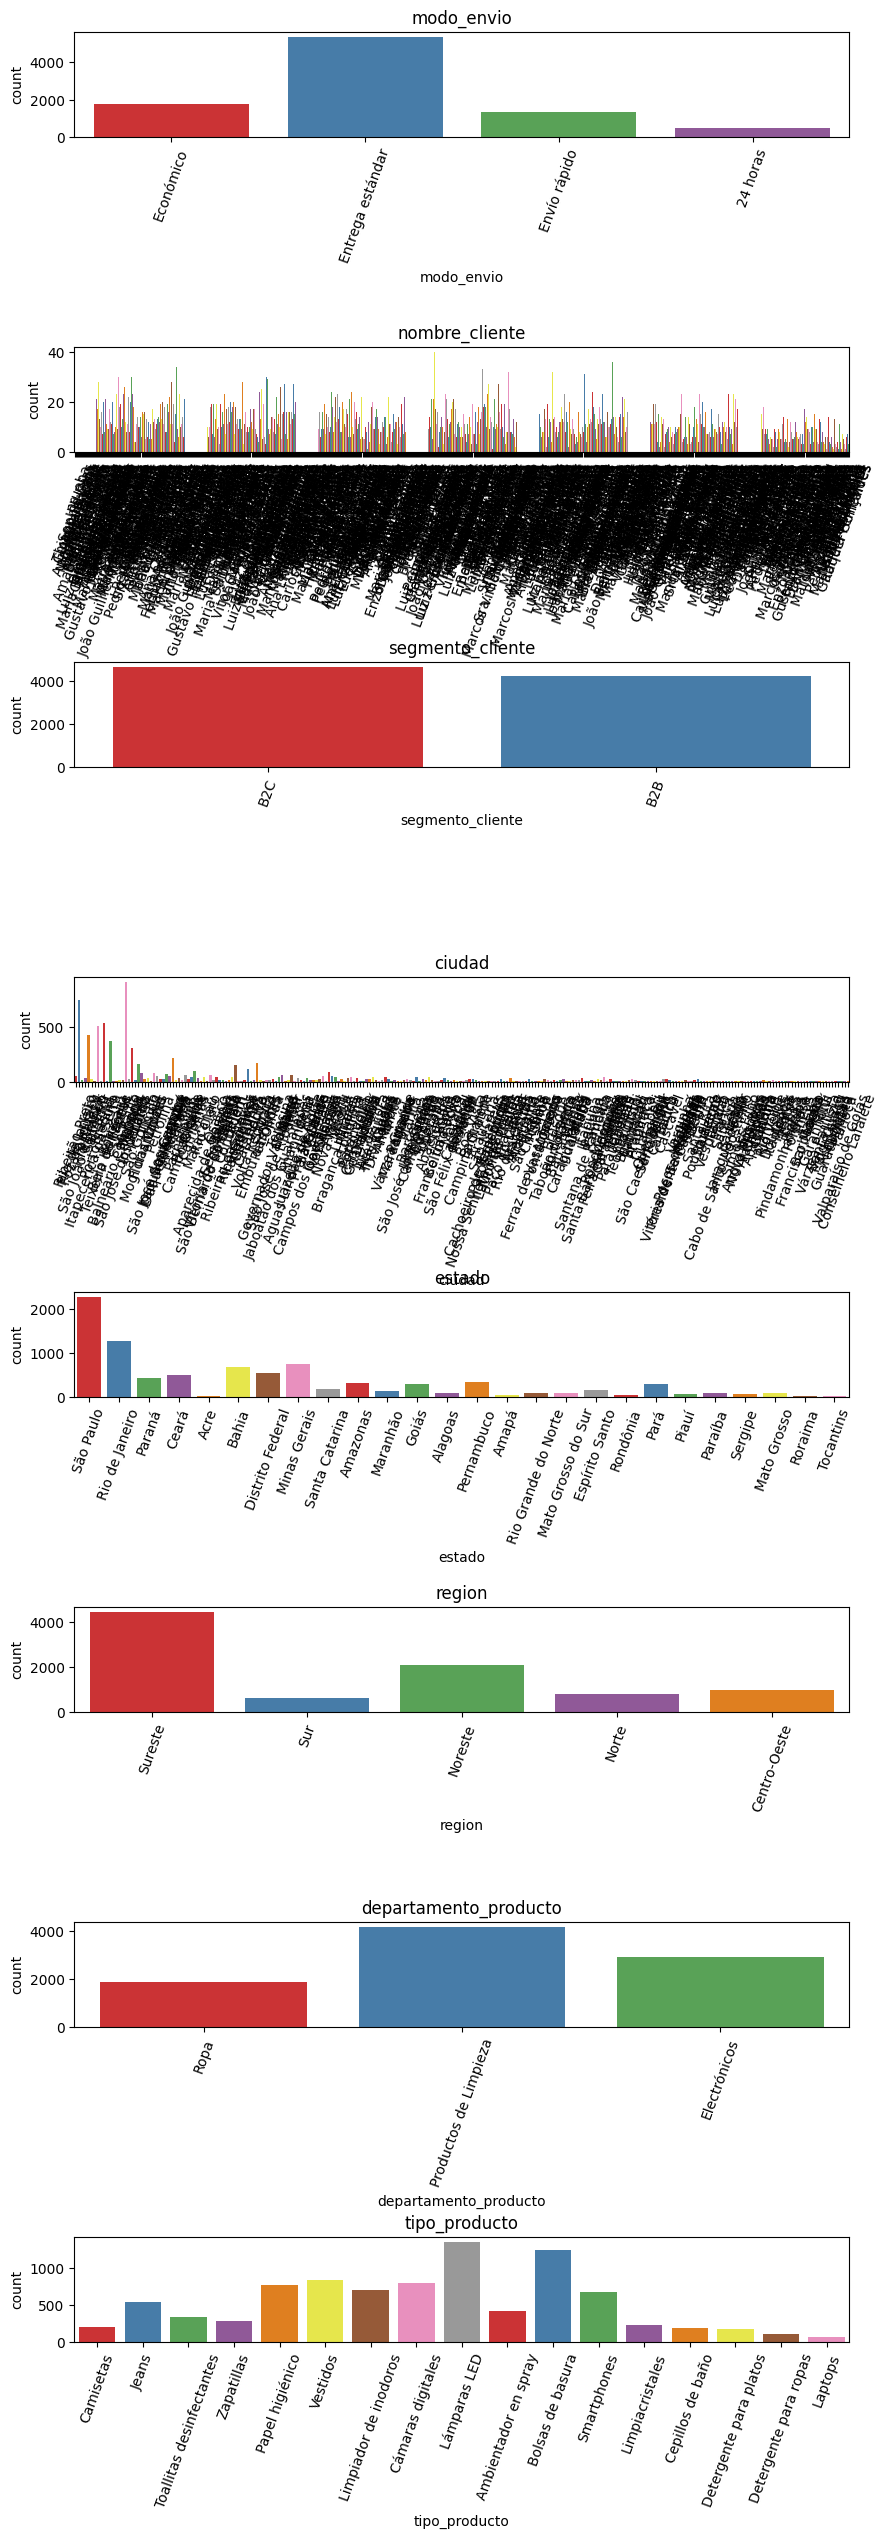

In [10]:
# Graficar los subnivelesde de las columnas categoricas
cols_categoricas = df_ventas_limpio.select_dtypes(include=['object']).columns

fig, ax = plt.subplots(nrows=len(cols_categoricas), ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=2)

for i, col in enumerate(cols_categoricas):
    sns.countplot(x=col, data=df_ventas_limpio, ax=ax[i], palette='Set1')
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=70)

plt.show()

#### Veo con unique las dos columnas que no se ven bien su categorias

In [11]:
df_ventas_limpio['nombre_cliente'].unique()

array(['Thiago Silveira', 'Giovanna Lima', 'Ana Júlia da Cruz',
       'Sophia Dias', 'prueba', 'Alana Ramos', 'Nicolas Rezende',
       'Gabriel da Paz', 'Amanda Nascimento', 'Alice Ribeiro',
       'Bianca Campos', 'Nicole Gomes', 'Melissa da Rosa',
       'Felipe Rodrigues', 'Benjamin Moura', 'Luiz Henrique Rezende',
       'Maria Eduarda Rodrigues', 'Heitor Silveira', 'Kaique Aragão',
       'Lara Pinto', 'Alexandre Vieira', 'Diego Nascimento',
       'João Pedro Silveira', 'Caroline Cavalcanti', 'Ana Beatriz Souza',
       'Vitor Hugo Dias', 'Gustavo Henrique Almeida', 'Alexandre Mendes',
       'Renan Santos', 'Marcela da Conceição', 'João Lucas Rocha',
       'Mariane Costa', 'Sarah Oliveira', 'Ana Beatriz Barros',
       'Benício da Mota', 'Vicente Novaes', 'João Lucas Ramos',
       'Juan da Conceição', 'Fernando Farias', 'Vicente Nogueira',
       'Arthur Cavalcanti', 'Alícia da Mota', 'Kevin das Neves',
       'João Guilherme da Conceição', 'Maria Vitória Silveira',
       '

- **En la 4° posicion se puede ver un cliente que se llama prueba, lo filtrare y lo eliminare**

In [12]:
df_ventas_limpio['ciudad'].unique()

array(['Ribeirão Preto', 'Rio de Janeiro', 'Foz do Iguaçu',
       'São João de Meriti', 'Fortaleza', 'Rio Branco',
       'Itapecerica da Serra', 'Salvador', 'Porto Seguro', 'Brasília',
       'Teixeira de Freitas', 'Belo Horizonte', 'Botucatu',
       'Balneário Camboriú', 'Itapevi', 'São José dos Pinhais',
       'São Paulo', 'Maringá', 'Manaus', 'Imperatriz', 'Goiânia',
       'São Gonçalo', 'Mogi das Cruzes', 'Florianópolis', 'Timon',
       'Maceió', 'São José dos Campos', 'Petrolina', 'Itaquaquecetuba',
       'Duque de Caxias', 'Santo André', 'Curitiba', 'Americana',
       'Macapá', 'Parnamirim', 'Campo Grande', 'Piracicaba', 'Joinville',
       'Campinas', 'Serra', 'Maracanaú', 'Aparecida de Goiânia',
       'Rio Claro', 'São Bernardo do Campo', 'Vitória da Conquista',
       'Osasco', 'Sete Lagoas', 'Barueri', 'Ji-Paraná',
       'Ribeirão das Neves', 'Contagem', 'Belém', 'Ribeirão Pires',
       'Itapetininga', 'São José', 'Guarulhos', 'Catanduva',
       'Volta Redonda', '

### 2.4 Eliminar filas con registros de prueba

In [13]:
# Filtramos la columna nombre_cliente cuyo valor sea prueba
df_ventas_prueba = df_ventas_limpio[df_ventas_limpio['nombre_cliente'] == 'prueba']
df_ventas_prueba

,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,estado,region,departamento_producto,tipo_producto,precio_base,precio_unit_sin_desc,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia
12,2022-04-16,2022-04-21,Entrega estándar,prueba,B2C,São João de Meriti,Rio de Janeiro,Sureste,Productos de Limpieza,Bolsas de basura,14.54,19.59,0.1,17.63,3,52.89,9.27
2634,2022-11-19,2022-11-25,Entrega estándar,prueba,B2B,Ribeirão Pires,São Paulo,Sureste,Ropa,Vestidos,13.27,16.80,0.0,16.80,4,67.20,14.12
4001,2022-08-15,2022-08-22,Entrega estándar,prueba,B2C,Rio de Janeiro,Rio de Janeiro,Sureste,Ropa,Zapatillas,471.11,526.74,0.1,474.07,3,1422.21,8.88
4037,2021-11-15,2021-11-19,Entrega estándar,prueba,B2C,Belo Horizonte,Minas Gerais,Sureste,Electrónicos,Lámparas LED,7.22,6.50,0.4,3.90,2,7.80,-6.64


In [14]:
# Eliminamos de la columna nombre_cliente las filas cuyo valor sea prueba
df_ventas_limpio = df_ventas_limpio[df_ventas_limpio['nombre_cliente'] != 'prueba']


In [15]:
# comprobamos que no tengamos duplicados
df_ventas_limpio[df_ventas_limpio['nombre_cliente'] == 'prueba']

,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,estado,region,departamento_producto,tipo_producto,precio_base,precio_unit_sin_desc,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia


### 2.5 Eliminar filas con valor nulo

In [16]:
# Ver cantidad de datos nulos por columna
df_ventas_limpio.isnull().sum()

fecha_pedido             0
fecha_envio              0
modo_envio               0
nombre_cliente           2
segmento_cliente         0
ciudad                   0
estado                   0
region                   0
departamento_producto    0
tipo_producto            0
precio_base              0
precio_unit_sin_desc     0
descuento                0
precio_unit_venta        0
cantidad_pedido          0
total_venta              0
total_ganancia           0
dtype: int64

**Eliminar filas con valor nulo en la columna nombre_cliente**

In [17]:
# Eliminamos los dos datos nulos en la columna nombre_cliente
df_ventas_limpio = df_ventas_limpio.dropna(subset=['nombre_cliente'])
df_ventas_limpio.isnull().sum()

fecha_pedido             0
fecha_envio              0
modo_envio               0
nombre_cliente           0
segmento_cliente         0
ciudad                   0
estado                   0
region                   0
departamento_producto    0
tipo_producto            0
precio_base              0
precio_unit_sin_desc     0
descuento                0
precio_unit_venta        0
cantidad_pedido          0
total_venta              0
total_ganancia           0
dtype: int64

### 2.6 Filtrar operaciones sin ganancia

In [18]:
df_ventas_limpio.describe()

,fecha_pedido,fecha_envio,precio_base,precio_unit_sin_desc,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia
count,8933,8933,8933.000000,8933.000000,8933.000000,8933.000000,8933.000000,8933.000000,8933.000000
mean,2021-05-01 22:51:00.382850304,2021-04-30 21:21:13.077353472,196.174135,227.386990,0.077201,209.925325,3.803649,792.389409,50.850146
min,2019-01-04 00:00:00,2019-01-08 00:00:00,2.060000,1.900000,0.000000,1.140000,1.000000,1.510000,-11219.950000
25%,2020-05-26 00:00:00,2020-05-16 00:00:00,15.990000,20.030000,0.000000,18.670000,2.000000,59.350000,3.000000
50%,2021-06-27 00:00:00,2021-06-25 00:00:00,50.580000,60.380000,0.075000,55.350000,3.000000,187.040000,14.800000
75%,2022-05-16 00:00:00,2022-05-16 00:00:00,208.220000,237.860000,0.100000,217.570000,5.000000,717.960000,50.450000
max,2022-12-31 00:00:00,2022-12-31 00:00:00,9043.980000,11899.970000,0.400000,11899.970000,14.000000,59499.850000,14280.000000
std,NaN,NaN,436.385758,522.231704,0.103031,486.365531,2.235908,2049.241482,415.595741


**se ven numero negativos en total_ganancia**

In [19]:
# Filtro las "perdidas" los valores menor a cero 
filtro_perdidas = df_ventas_limpio[df_ventas_limpio['total_ganancia'] < 0]
filtro_perdidas


,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,estado,region,departamento_producto,tipo_producto,precio_base,precio_unit_sin_desc,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia
3,2020-10-12,2020-10-19,Entrega estándar,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sur,Ropa,Zapatillas,781.38,840.19,0.225,651.15,5,3255.75,-651.15
14,2020-11-23,2020-11-27,Entrega estándar,Nicolas Rezende,B2B,Rio Branco,Acre,Norte,Productos de Limpieza,Ambientador en spray,88.90,77.98,0.400,46.79,5,233.95,-210.55
15,2020-11-23,2020-11-27,Entrega estándar,Nicolas Rezende,B2B,Rio Branco,Acre,Norte,Electrónicos,Lámparas LED,5.04,4.80,0.400,2.88,3,8.64,-6.48
22,2022-07-17,2022-07-19,Económico,Bianca Campos,B2C,Brasília,Distrito Federal,Centro-Oeste,Ropa,Jeans,122.20,142.74,0.150,121.33,2,242.66,-1.74
26,2020-09-18,2020-09-22,Entrega estándar,Felipe Rodrigues,B2C,Brasília,Distrito Federal,Centro-Oeste,Ropa,Camisetas,1902.04,1996.89,0.250,1497.67,7,10483.69,-2830.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8871,2021-03-16,2021-03-20,Entrega estándar,Ana Lívia Dias,B2B,Conselheiro Lafaiete,Minas Gerais,Sureste,Electrónicos,Lámparas LED,19.57,18.12,0.400,10.87,7,76.09,-60.90
8872,2019-11-25,2019-12-01,Entrega estándar,João Gabriel das Neves,B2B,Ribeirão das Neves,Minas Gerais,Sureste,Electrónicos,Lámparas LED,9.11,10.02,0.350,6.51,3,19.53,-7.80
8882,2020-11-14,2020-11-18,Entrega estándar,Danilo Barbosa,B2C,São Caetano do Sur,São Paulo,Sureste,Ropa,Camisetas,597.92,627.92,0.075,580.83,4,2323.32,-68.36
8886,2021-06-04,2021-06-07,Económico,Henrique Carvalho,B2B,Rio de Janeiro,Rio de Janeiro,Sureste,Ropa,Zapatillas,122.36,134.28,0.100,120.85,2,241.70,-3.02


### filtramos las filas donde el valor en la columna total_ganancia es mayor que cero y eliminamos

In [20]:
# filtramos las filas donde el valor en la columna total_ganancia es mayor que cero
# reset_index para actualizar el índice del DataFrame. 
# el parámetro drop=True se utiliza para descartar el índice anterior
df_ventas_limpio = df_ventas_limpio[df_ventas_limpio['total_ganancia'] > 0]
df_ventas_limpio = df_ventas_limpio.reset_index(drop=True)


In [21]:
df_ventas_limpio.shape

(7210, 17)

### DF limpio

In [22]:
print('Informacion:')
print(df_ventas_limpio.info())
print('------------')
print('Duplicados:')
print(df_ventas_limpio.duplicated().sum())
print('------------')
print('Registros de pruebas:')
print((df_ventas_limpio['nombre_cliente'] == 'prueba').sum())
print('------------')
print('Registros con ganancias <=0')
print((df_ventas_limpio['total_ganancia'] <=0).sum())

Informacion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7210 entries, 0 to 7209
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha_pedido           7210 non-null   datetime64[ns]
 1   fecha_envio            7210 non-null   datetime64[ns]
 2   modo_envio             7210 non-null   object        
 3   nombre_cliente         7210 non-null   object        
 4   segmento_cliente       7210 non-null   object        
 5   ciudad                 7210 non-null   object        
 6   estado                 7210 non-null   object        
 7   region                 7210 non-null   object        
 8   departamento_producto  7210 non-null   object        
 9   tipo_producto          7210 non-null   object        
 10  precio_base            7210 non-null   float64       
 11  precio_unit_sin_desc   7210 non-null   float64       
 12  descuento              7210 non-null   float64   

## Funcion para obtener y limpiar datos

In [23]:
def obtencion_datos():
    import pandas as pd 
    import matplotlib.pyplot as plt  
    import matplotlib.dates as mdates
    global df_ventas, df_ventas_limpio
    
    df_ventas = pd.read_csv("reporte_ventas.csv", sep=",")
    print('Informacion:')
    print(df_ventas.info())
    print('------------')
    print('Duplicados:')
    print(df_ventas.duplicated().sum())
    print('------------')
    print('Registros de pruebas:')
    print((df_ventas['nombre_cliente'] == 'prueba').sum())
    print('------------')
    print('Registros con ganancias <=0')
    print((df_ventas['total_ganancia'] <=0).sum())
    
    df_ventas['fecha_pedido'] = pd.to_datetime(df_ventas['fecha_pedido'], format='%Y-%m-%d')
    df_ventas['fecha_envio'] = pd.to_datetime(df_ventas['fecha_envio'], format='%Y-%m-%d')
    
    print(f'Tamaño del set antes de eliminar las filas repetidas: {df_ventas.shape}')
    df_ventas_limpio = df_ventas.drop_duplicates(inplace=False)  # inplace=False para que devuelva un nuevo DataFrame
    print(f'Tamaño del set después de eliminar las filas repetidas: {df_ventas_limpio.shape}')
    
    # Eliminamos de la columna nombre_cliente las filas cuyo valor sea prueba
    df_ventas_limpio = df_ventas_limpio[df_ventas_limpio['nombre_cliente'] != 'prueba']
    
    # Eliminamos los dos datos nulos en la columna nombre_cliente
    df_ventas_limpio = df_ventas_limpio.dropna(subset=['nombre_cliente'])
    
    # filtramos las filas donde el valor en la columna total_ganancia es mayor que cero
    # reset_index para actualizar el índice del DataFrame. 
    # ll parámetro drop=True se utiliza para descartar el índice anterior
    df_ventas_limpio = df_ventas_limpio[df_ventas_limpio['total_ganancia'] > 0]
    df_ventas_limpio = df_ventas_limpio.reset_index(drop=True)
    
    # Df limpio
    print('Informacion:')
    print(df_ventas_limpio.info())
    print('------------')
    print('Duplicados:')
    print(df_ventas_limpio.duplicated().sum())
    print('------------')
    print('Registros de pruebas:')
    print((df_ventas_limpio['nombre_cliente'] == 'prueba').sum())
    print('------------')
    print('Registros con ganancias <=0')
    print((df_ventas_limpio['total_ganancia'] <=0).sum())
    
obtencion_datos()   

Informacion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8954 entries, 0 to 8953
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fecha_pedido           8954 non-null   object 
 1   fecha_envio            8954 non-null   object 
 2   modo_envio             8954 non-null   object 
 3   nombre_cliente         8952 non-null   object 
 4   segmento_cliente       8954 non-null   object 
 5   ciudad                 8954 non-null   object 
 6   estado                 8954 non-null   object 
 7   region                 8954 non-null   object 
 8   departamento_producto  8954 non-null   object 
 9   tipo_producto          8954 non-null   object 
 10  precio_base            8954 non-null   float64
 11  precio_unit_sin_desc   8954 non-null   float64
 12  descuento              8954 non-null   float64
 13  precio_unit_venta      8954 non-null   float64
 14  cantidad_pedido        8954 non-null   int6

-----------------




## 3. **Pregunta 1: ¿Cuáles son las ventas totales por año? ¿Y qué año tuvo mejor desempeño?**

### 1.1 Crea una copia de la base df_ventas_limpio en un nuevo dataframe df_ventas_año

In [24]:
# Creamos un nuevo df con las columnas de fecha y total ventas
df_ventas_año = df_ventas_limpio[['fecha_pedido', 'total_venta']].copy()
df_ventas_año

,fecha_pedido,total_venta
0,2021-11-09,890.66
1,2021-11-09,2488.59
2,2021-06-13,49.72
3,2020-10-12,76.04
4,2019-06-10,166.11
...,...,...
7205,2021-09-30,123.22
7206,2022-11-18,271.97
7207,2022-11-18,700.75
7208,2019-01-22,85.83


### 1.2 Creamos una nueva columna en df_ventas_año llamada año y  eliminamos la columna fecha_pedido

In [25]:
# Creamos una nueva columna año a partir de la columna fecha_pedido
df_ventas_año['año'] = df_ventas_año['fecha_pedido'].dt.year
df_ventas_año

,fecha_pedido,total_venta,año
0,2021-11-09,890.66,2021
1,2021-11-09,2488.59,2021
2,2021-06-13,49.72,2021
3,2020-10-12,76.04,2020
4,2019-06-10,166.11,2019
...,...,...,...
7205,2021-09-30,123.22,2021
7206,2022-11-18,271.97,2022
7207,2022-11-18,700.75,2022
7208,2019-01-22,85.83,2019


In [26]:
# Eliminamos la columna fecha_pedido
df_ventas_año.drop(['fecha_pedido'], axis=1, inplace=True)
df_ventas_año

,total_venta,año
0,890.66,2021
1,2488.59,2021
2,49.72,2021
3,76.04,2020
4,166.11,2019
...,...,...
7205,123.22,2021
7206,271.97,2022
7207,700.75,2022
7208,85.83,2019


### 1.3 agrupamos por la columna año y sumamos los valores

In [27]:
# agrupamos por la columna año y sumamos los valores
df_ventas_año = df_ventas_año.groupby('año').aggregate({'total_venta': 'sum'}).reset_index()
df_ventas_año

,año,total_venta
0,2019,1052735.86
1,2020,1190541.40
2,2021,1535801.44
3,2022,1825927.50


###  Calculamos el porcentaje de aumento de las ventas en cada año

In [28]:
# Calculamos el porcentaje de aumento de las ventas en cada año
df_ventas_año_aumento = df_ventas_año.copy()
df_ventas_año_aumento['porcentaje_aumento'] = df_ventas_año_aumento['total_venta'].pct_change() * 100

# Filtrar para excluir el primer año ya que no hay un año anterior para calcular el cambio porcentual
df_ventas_año_aumento = df_ventas_año_aumento[df_ventas_año_aumento['año'] != df_ventas_año_aumento['año'].min()]

print("Porcentaje de Aumento de Ventas:")
print("")
#print(df_ventas_año_aumento[['año', 'porcentaje_aumento']])
df_ventas_año_aumento

Porcentaje de Aumento de Ventas:



,año,total_venta,porcentaje_aumento
1,2020,1190541.40,13.090229
2,2021,1535801.44,29.000255
3,2022,1825927.50,18.890857


### **Funcion para responder Cuáles son las ventas totales por año Y qué año tuvo mejor desempeño**

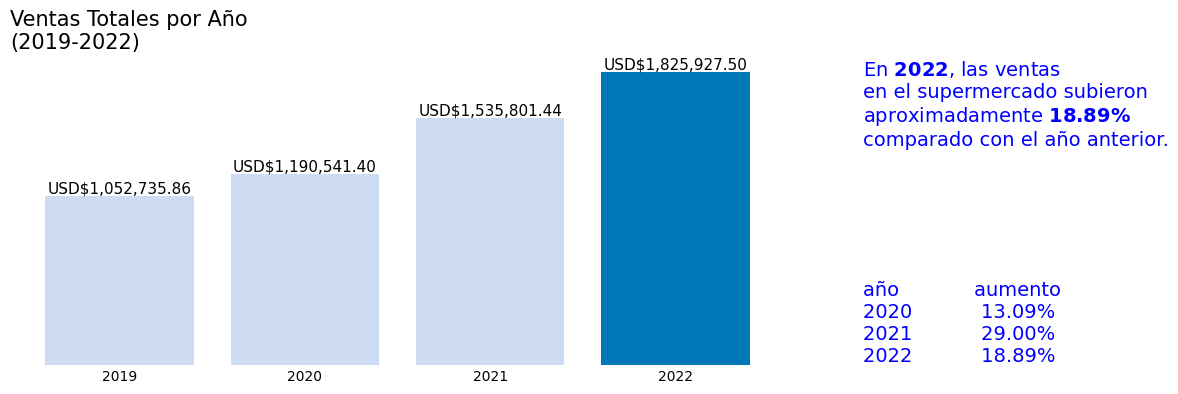

In [29]:
def  pregunta_1():
    global df_ventas, df_ventas_limpio
    
    # Creamos un nuevo df con las columnas de fecha
    df_ventas_año = df_ventas_limpio[['fecha_pedido', 'total_venta']].copy()
    # Creamos una nueva columna año
    df_ventas_año['año'] = df_ventas_año['fecha_pedido'].dt.year
    # Eliminamos la columna fecha_pedido
    df_ventas_año.drop(['fecha_pedido'], axis=1, inplace=True)
    # agrupamos por la columna año y sumamos los valores
    df_ventas_año = df_ventas_año.groupby('año').aggregate({'total_venta': 'sum'}).reset_index()
    # graficamos
    # Creamos una lista de colores
    colores = ['#CDDBF3', '#CDDBF3', '#CDDBF3', '#0077b6']

    # Crear la figura y el eje
    fig, ax = plt.subplots(figsize=(10, 4))

    # Crear el gráfico de barras verticales
    ax.bar(df_ventas_año['año'], df_ventas_año['total_venta'], color=colores, width=0.8)

    # Colocar los valores sobre cada barra
    for bar in ax.patches:
        valor = bar.get_height()
        qtd = f"USD${valor:,.2f}"  # Formatear el valor como texto con símbolo de dólar
        ax.text(bar.get_x() + bar.get_width() / 2.0, valor, qtd, ha='center', va='bottom',fontsize=11,  color='black')

    # Configuramos el titulo
    ax.set_title('Ventas Totales por Año\n(2019-2022)',loc='left', fontsize=15,  color='black')

    # Controlar el formato de las etiquetas del eje X
    ax.set_xticks(df_ventas_año['año'])
    ax.set_xticklabels(df_ventas_año['año'].astype(int))

    # Ocultar todos los bordes del gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Quitar los ticks del eje X y Y
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_yticks([])  # Ocultar los ticks del eje Y

    # Texto 
    texto = ("En $\\mathbf{2022}$, las ventas\n"
             "en el supermercado subieron\n"
             "aproximadamente $\\mathbf{18.89\\%}$\n"
             "comparado con el año anterior.")

    # egundo texto
    texto2 = ("año            aumento\n"
              "2020           13.09%\n"
              "2021           29.00%\n"
              "2022           18.89%")

    # Añadir texto y alinear 
    ax.text(1.10, 0.70, texto, transform=ax.transAxes, ha='left', va='bottom', fontsize=14, color='blue')
    ax.text(1.10, 0.0, texto2, transform=ax.transAxes, ha='left', va='bottom', fontsize=14, color='blue')

    plt.show()

pregunta_1()    
    

## 4. Pregunta2

 ## Pregunta 2: ¿Cuáles son los 7 productos que más ganancias mostraron durante todo el período?

In [30]:
df_ventas_limpio

,fecha_pedido,fecha_envio,modo_envio,nombre_cliente,segmento_cliente,ciudad,estado,region,departamento_producto,tipo_producto,precio_base,precio_unit_sin_desc,descuento,precio_unit_venta,cantidad_pedido,total_venta,total_ganancia
0,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sureste,Ropa,Camisetas,409.70,445.33,0.0,445.33,2,890.66,71.26
1,2021-11-09,2021-11-12,Económico,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sureste,Ropa,Jeans,705.10,829.53,0.0,829.53,3,2488.59,373.29
2,2021-06-13,2021-06-17,Económico,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sureste,Productos de Limpieza,Toallitas desinfectantes,19.02,24.86,0.0,24.86,2,49.72,11.68
3,2020-10-12,2020-10-19,Entrega estándar,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sur,Productos de Limpieza,Papel higiénico,35.88,42.24,0.1,38.02,2,76.04,4.28
4,2019-06-10,2019-06-15,Entrega estándar,Sophia Dias,B2C,Rio de Janeiro,Rio de Janeiro,Sureste,Ropa,Vestidos,20.29,23.73,0.0,23.73,7,166.11,24.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7205,2021-09-30,2021-10-04,Entrega estándar,Enrique Santos,B2C,Rio de Janeiro,Rio de Janeiro,Sureste,Electrónicos,Smartphones,97.34,123.22,0.0,123.22,1,123.22,25.88
7206,2022-11-18,2022-11-22,Entrega estándar,Heitor Silveira,B2B,Jequié,Bahia,Noreste,Electrónicos,Smartphones,223.01,271.97,0.0,271.97,1,271.97,48.96
7207,2022-11-18,2022-11-22,Entrega estándar,Heitor Silveira,B2B,Jequié,Bahia,Noreste,Electrónicos,Cámaras digitales,121.23,140.15,0.0,140.15,5,700.75,94.60
7208,2019-01-22,2019-01-24,Económico,Isabel Araújo,B2C,João Pessoa,Paraíba,Noreste,Ropa,Vestidos,26.29,31.79,0.1,28.61,3,85.83,6.96


### 4.1 Creamos un nuevo df con las columnas tipo_producto y total_ganancia a partir de el df_ventas_limpio

In [31]:
# Crea una copia del DataFrame df_ventas_limpio
df_top_ganancias = df_ventas_limpio.copy()

# Crear un DataFrame nuevo con los datos de las columnas tipo_producto y total_ganancia
df_top_ganancias = df_top_ganancias[['tipo_producto', 'total_ganancia']]
df_top_ganancias.head()

,tipo_producto,total_ganancia
0,Camisetas,71.26
1,Jeans,373.29
2,Toallitas desinfectantes,11.68
3,Papel higiénico,4.28
4,Vestidos,24.08


### 4.2 Agrupamos por tipo_producto, sumar la columna total_ganancia y ordenar en orden descendente

In [32]:
# agrupamos por tipo_producto y departamento_producto luego sumamos los valores de la columna total_ganancia
df_top_ganancias = df_top_ganancias.groupby('tipo_producto')['total_ganancia'].agg('sum')

# ordenamos  la columna total_ganancia en orden descendente 
df_top_ganancias = df_top_ganancias.sort_values(ascending=False)

# recetear el index
df_top_ganancias = df_top_ganancias.reset_index(name='total_ganancia')
df_top_ganancias


,tipo_producto,total_ganancia
0,Lámparas LED,111453.41
1,Laptops,91148.67
2,Cámaras digitales,80192.63
3,Smartphones,64705.58
4,Jeans,55982.95
5,Detergente para ropas,55766.39
6,Bolsas de basura,53328.46
7,Papel higiénico,43546.05
8,Ambientador en spray,40976.16
9,Vestidos,29784.63


### 4.3 Los 7 productos con mas ganancias

In [33]:
# ordenamos el DataFrame por total_ganancia en orden descendente
df_top_ganancias = df_top_ganancias.sort_values(by='total_ganancia', ascending=False)

# Resetear los indices para mantener el orden original
df_top_ganancias = df_top_ganancias.reset_index(drop=True)

# Seleccionar los primeros 7 registros
df_top_ganancias = df_top_ganancias.head(7)

df_top_ganancias


,tipo_producto,total_ganancia
0,Lámparas LED,111453.41
1,Laptops,91148.67
2,Cámaras digitales,80192.63
3,Smartphones,64705.58
4,Jeans,55982.95
5,Detergente para ropas,55766.39
6,Bolsas de basura,53328.46


---------------------------------------------------------------------------




###  Visualización

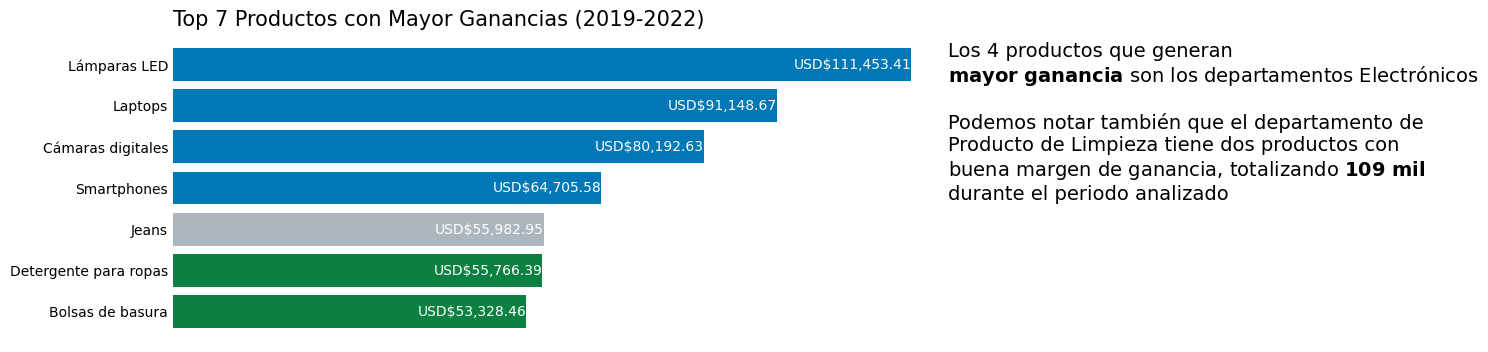

In [34]:
def pregunta_2():
    global df_ventas, df_ventas_limpio
    
    # Crea una copia del DataFrame df_ventas_limpio
    df_top_ganancias = df_ventas_limpio.copy()

    # Crear un DataFrame nuevo con los datos de las columnas tipo_producto y total_ganancia
    df_top_ganancias = df_top_ganancias[['tipo_producto', 'total_ganancia']]
    
    # agrupamos por tipo_producto y departamento_producto luego sumamos los valores de la columna total_ganancia
    df_top_ganancias = df_top_ganancias.groupby('tipo_producto')['total_ganancia'].agg('sum')

    # ordenamos  la columna total_ganancia en orden descendente 
    df_top_ganancias = df_top_ganancias.sort_values(ascending=False)

    # recetear el index
    df_top_ganancias = df_top_ganancias.reset_index(name='total_ganancia')
    
    
    # ordenamos el DataFrame por total_ganancia en orden descendente
    df_top_ganancias = df_top_ganancias.sort_values(by='total_ganancia', ascending=False)

    # Resetear los indices para mantener el orden original
    df_top_ganancias = df_top_ganancias.reset_index(drop=True)

    # Seleccionar los primeros 7 registros
    df_top_ganancias = df_top_ganancias.head(7)

    

    # Creamos una lista de colores
    colores = ['#0077b6', '#0077b6', '#0077b6', '#0077b6', '#adb5bd', '#0C8040', '#0C8040']

    # Crear la figura y el eje
    fig, ax = plt.subplots(figsize=(10, 4))

    # Crear el gráfico de barras horizontales
    bars = ax.barh(df_top_ganancias['tipo_producto'], df_top_ganancias['total_ganancia'], color=colores, align='center')

    # Colocar los valores dentro de las barras con color blanco
    for bar in bars:
        valor = bar.get_width()
        qtd = f"USD${valor:,.2f}"  # Formatear el valor como texto con símbolo de dólar
        ax.text(valor, bar.get_y() + bar.get_height()/2, qtd, ha='right', va='center', color='white')

    # Configuración del titulo
    ax.set_title('Top 7 Productos con Mayor Ganancias (2019-2022)', loc='left', fontsize=15,  color='black')
    
    # Invertir el orden de las barras
    ax.invert_yaxis()

    # Ocultar todos los bordes del gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Quitar los ticks del eje X y Y
    ax.tick_params(axis='both', which='both', length=0)

    # Ocultar los ticks del eje Y
    ax.tick_params(axis='y', which='both', left=False)

    # Quitar los valores del eje X
    ax.set_xticks([])
    
    # Texto $\\mathbf{2022}$
    texto = ("Los 4 productos que generan\n"
         "$\\mathbf{mayor}$ $\\mathbf{ganancia}$ son los departamentos "
         "Electrónicos\n"  
         "\n"
         "Podemos notar también que el departamento de\n"
         "Producto de Limpieza tiene dos productos con\n" 
         "buena margen de ganancia, totalizando $\\mathbf{109\\ mil}$\n"  
         "durante el periodo analizado"
            )


    # Añadir texto y alinear 
    ax.text(1.0, 0.45, texto, transform=ax.transAxes, ha='left', va='bottom', fontsize=14, color='black')



    # Mostrar el gráfico
    plt.show()

 
pregunta_2()

## 5. Pregunta 3: Si separamos las ventas totales por año y por regiones ¿Qué insight podemos obtener de nuestras ventas?

### 5.1 Creamos un df a partir de df_ventas_limpio con la informacion de las columnas fecha_pedido, region, total_venta 

In [35]:
# Creamos un df a partir de df_ventas_limpio con la informacion de las columnas fecha_pedido, region, total_venta 
df_ventas_año_region = df_ventas_limpio[['fecha_pedido', 'region', 'total_venta']].copy()
df_ventas_año_region

,fecha_pedido,region,total_venta
0,2021-11-09,Sureste,890.66
1,2021-11-09,Sureste,2488.59
2,2021-06-13,Sureste,49.72
3,2020-10-12,Sur,76.04
4,2019-06-10,Sureste,166.11
...,...,...,...
7205,2021-09-30,Sureste,123.22
7206,2022-11-18,Noreste,271.97
7207,2022-11-18,Noreste,700.75
7208,2019-01-22,Noreste,85.83


### 5.2 Creamos la columna año y eliminamos la columna fecha_pedido

In [36]:
# Creamos la columna año
df_ventas_año_region['año'] = df_ventas_año_region['fecha_pedido'].dt.year

# Eliminamos la columna fecha_pedido
df_ventas_año_region.drop(columns=['fecha_pedido'], inplace=True)
df_ventas_año_region

,region,total_venta,año
0,Sureste,890.66,2021
1,Sureste,2488.59,2021
2,Sureste,49.72,2021
3,Sur,76.04,2020
4,Sureste,166.11,2019
...,...,...,...
7205,Sureste,123.22,2021
7206,Noreste,271.97,2022
7207,Noreste,700.75,2022
7208,Noreste,85.83,2019


### 5.3  Generamos la tabla cruzada con el método pd.crosstab

In [37]:
# Generamos la tabla cruzada
df_ventas_año_region = pd.crosstab(index=df_ventas_año_region['año'], columns=df_ventas_año_region['region'], values=df_ventas_año_region['total_venta'], aggfunc='sum')

# Reordenamos las columnas
column_order = ['Sureste', 'Noreste', 'Centro-Oeste', 'Norte', 'Sur']
df_ventas_año_region = df_ventas_año_region[column_order]

df_ventas_año_region

region,Sureste,Noreste,Centro-Oeste,Norte,Sur
año,,,,,
2019,522953.51,346407.40,67406.37,71778.74,44189.84
2020,648732.79,282431.39,90616.80,107309.38,61451.04
2021,870894.51,359829.92,125344.52,69534.02,110198.47
2022,980404.44,549254.20,97679.64,99195.86,99393.36


### 5.4 Visualizacion 

In [38]:
# sumamos las ventas de las regiones Sureste, Noreste y Centro-Oeste para cada año
df_ventas_concentradas = df_ventas_año_region[['Sureste', 'Noreste', 'Centro-Oeste']].sum(axis=1)

# calculamos el porcentaje con respecto al total de ventas
total_ventas = df_ventas_año_region.sum(axis=1)
porcentaje_concentradas = (df_ventas_concentradas / total_ventas) * 100

print(f"Porcentaje de ventas concentradas en Sureste, Noreste y Centro-Oeste desde 2019: {porcentaje_concentradas.iloc[-1]:.2f}%")

Porcentaje de ventas concentradas en Sureste, Noreste y Centro-Oeste desde 2019: 89.12%


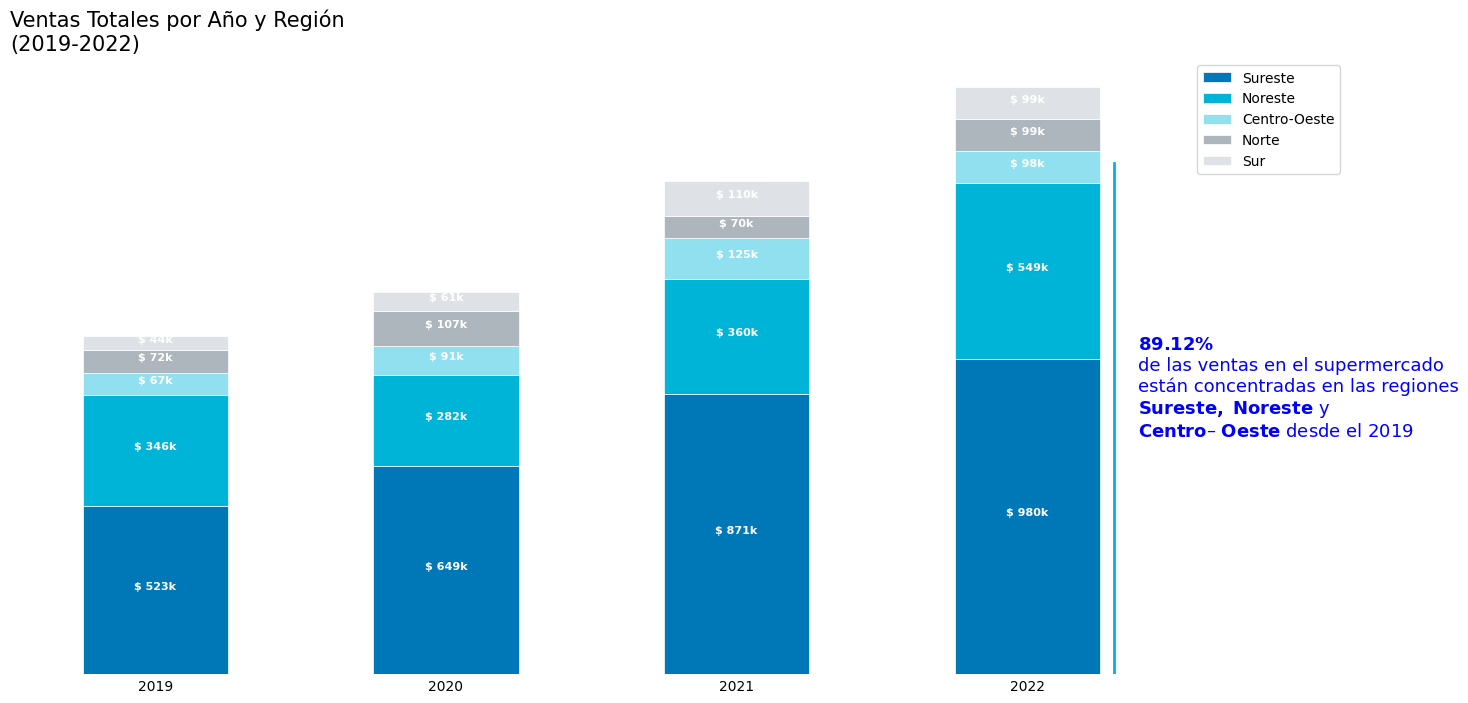

In [39]:
def pregunta_3():
    global df_ventas, df_ventas_limpio
    # Creamos un df a partir de df_ventas_limpio con la informacion de las columnas fecha_pedido, region, total_venta 
    df_ventas_año_region = df_ventas_limpio[['fecha_pedido', 'region', 'total_venta']].copy()
    # Creamos la columna año
    df_ventas_año_region['año'] = df_ventas_año_region['fecha_pedido'].dt.year
    # Eliminamos la columna fecha_pedido
    df_ventas_año_region.drop(columns=['fecha_pedido'], inplace=True)
    # Generamos la tabla cruzada
    df_ventas_año_region = pd.crosstab(index=df_ventas_año_region['año'], columns=df_ventas_año_region['region'], values=df_ventas_año_region['total_venta'], aggfunc='sum')

    # Reordenamos las columnas
    column_order = ['Sureste', 'Noreste', 'Centro-Oeste', 'Norte', 'Sur']
    df_ventas_año_region = df_ventas_año_region[column_order]
    # visuañizacion
    # Configuración de colores
    colores = ['#0077b6', '#00b4d8', '#90e0ef', '#adb5bd', '#dee2e6']

    # Crear el gráfico de columnas apiladas con bordes más visibles
    ax = df_ventas_año_region.plot(kind='bar', stacked=True, figsize=(15, 8), color=colores, edgecolor='white', linewidth=0.5)

    # Quitar la palabra "Año" en el eje x
    ax.set_xlabel("")

    # Quitar los ticks y etiquetas del eje y
    ax.get_yaxis().set_visible(False)

    # Añadir etiquetas a las barras
    for container in ax.containers:
        for i, bar in enumerate(container.patches):
            height = bar.get_height()
            if height > 0:  # Asegurarse de que hay un valor para mostrar
                label = f"$ {height / 1000:.0f}k"  # Formatear el valor en formato de miles
                x_position = bar.get_x() + bar.get_width() / 2
                y_position = bar.get_y() + height / 2
                ax.annotate(label,
                            xy=(x_position, y_position),
                            xytext=(0, 3),  # Distancia vertical desde el punto
                            textcoords="offset points",
                            ha='center', va='center',  # Colocar el texto en el centro
                            fontsize=8, fontweight='bold', color='white')  # Añadir negrita al texto

    # Configuracion del titulo
    ax.set_title('Ventas Totales por Año y Región\n(2019-2022)', loc='left', fontsize=15,  color='black')  # Mover el título a la izquierda

    # Rotar los años horizontalmente
    plt.xticks(rotation=0)

    # Mover la etiqueta de la región a la izquierda y ajustar la posición
    ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))

    # Texto debajo del gráfico
    texto = ("$\\mathbf{89.12\\%}$ \nde las ventas en el supermercado\n"
         "están concentradas en las regiones\n"
         "$\\mathbf{Sureste,}$ $\\mathbf{ Noreste}$ y\n"
         "$\\mathbf{Centro – }$ $\\mathbf{Oeste}$ desde el 2019")

    # Añadir texto y alinear a la izquierda
    ax.text(0.97, 0.38, texto, transform=ax.transAxes, ha='left', va='bottom', fontsize=13, color='blue')

    # Línea vertical de color azul
    ax.axvline(x=3.3, ymin=0.0, ymax=0.83, color='#00b4d8', linestyle='-', linewidth=2)

    # Ocultar todos los bordes del gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Quitar los ticks del eje X y Y
    ax.tick_params(axis='both', which='both', length=0)

    # Mostrar el gráfico
    plt.show()
pregunta_3()

### 6. Pregunta 4: ¿Cuál es el método de envío más utilizado por los clientes del Supermercado? ¿Es proporcional para B2B y B2C?

### 6.1 Creamos una copia de df_ventas_limpio y Guardamos solo las columnas modo_envio y segmento_cliente

In [40]:
# Creamos una copia de df_ventas_limpio
df_modo_envio = df_ventas_limpio.copy()
# Guardamos solo las columnas modo_envio y segmento_cliente
df_modo_envio = df_modo_envio[['modo_envio', 'segmento_cliente']]
df_modo_envio

,modo_envio,segmento_cliente
0,Económico,B2C
1,Económico,B2C
2,Económico,B2B
3,Entrega estándar,B2C
4,Entrega estándar,B2C
...,...,...
7205,Entrega estándar,B2C
7206,Entrega estándar,B2B
7207,Entrega estándar,B2B
7208,Económico,B2C


### 6.2 Generamos una tabla cruzada

In [41]:
# Generamos una tabla cruzada
df_modo_envio = pd.crosstab(index=df_modo_envio['modo_envio'], columns=df_modo_envio['segmento_cliente']).sort_values("B2B")
df_modo_envio


segmento_cliente,B2B,B2C
modo_envio,,
24 horas,171,231
Envío rápido,543,542
Económico,707,755
Entrega estándar,2048,2213


### 6.3 Visualizacion

In [42]:
# calculamos el porcentaje de entrega estándar
porcentaje_entrega_estandar = (df_modo_envio['B2B'] + df_modo_envio['B2C']).loc['Entrega estándar'] / df_modo_envio[['B2B', 'B2C']].sum().sum() * 100

print(f"El método de entrega estándar representa el {porcentaje_entrega_estandar:.2f}% de los pedidos.")

El método de entrega estándar representa el 59.10% de los pedidos.


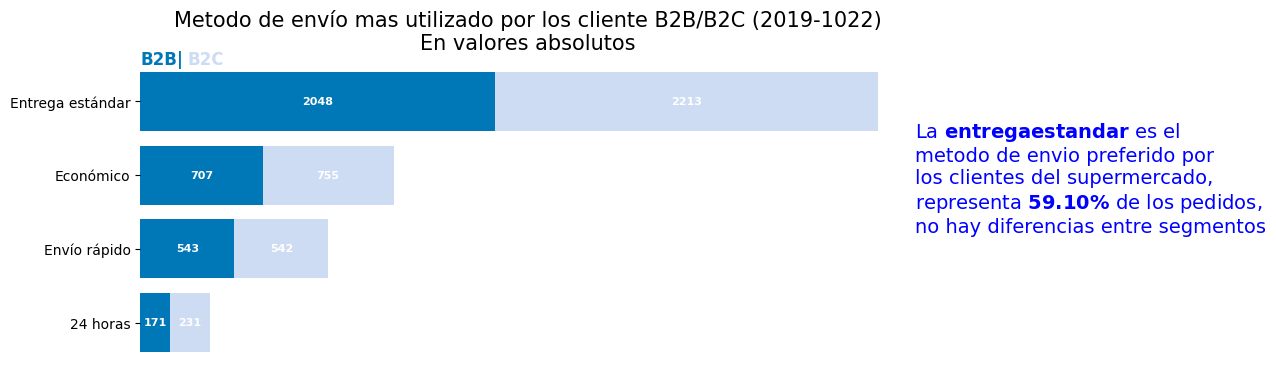

In [43]:
def pregunta_4():
    global df_ventas, df_ventas_limpio
        # Creamos una copia de df_ventas_limpio
    df_modo_envio = df_ventas_limpio.copy()
    # Guardamos solo las columnas modo_envio y segmento_cliente
    df_modo_envio = df_modo_envio[['modo_envio', 'segmento_cliente']]
    # Generamos una tabla cruzada
    df_modo_envio = pd.crosstab(index=df_modo_envio['modo_envio'], columns=df_modo_envio['segmento_cliente']).sort_values("B2B")
    
    # Visualizacion
    # Creamos una lista de colores
    colores = ['#0077b6', '#CDDBF3']

    # Crear la figura y el eje
    fig, ax = plt.subplots(figsize=(10, 4))

    # Crear el gráfico de barras horizontales
    bars_b2b = ax.barh(df_modo_envio.index, df_modo_envio['B2B'], color=colores[0])
    bars_b2c = ax.barh(df_modo_envio.index, df_modo_envio['B2C'], left=df_modo_envio['B2B'], color=colores[1])

    # Añadir etiquetas dentro de cada barra
    for bar in bars_b2b:
        label_x_position = bar.get_x() + bar.get_width() / 2
        label_y_position = bar.get_y() + bar.get_height() / 2
        label_value = f"{bar.get_width():.0f}"
        ax.text(label_x_position, label_y_position, label_value, 
                ha='center', va='center', color='white', fontsize=8, fontweight='bold')

    for bar in bars_b2c:
        label_x_position = bar.get_x() + bar.get_width() / 2
        label_y_position = bar.get_y() + bar.get_height() / 2
        label_value = f"{bar.get_width():.0f}"
        ax.text(label_x_position, label_y_position, label_value, 
                ha='center', va='center', color='white', fontsize=8, fontweight='bold')

    # Configuracion del titulo
    ax.set_title('Metodo de envío mas utilizado por los cliente B2B/B2C (2019-1022)\nEn valores absolutos', loc='center', fontsize=15, color='black')


    #leyenda con el valor de segmentos de clientes
    ax.text(0, 3.5, 'B2B|', fontsize=12, fontweight='bold', color=colores[0])
    ax.text(270, 3.5, 'B2C', fontsize=12, fontweight='bold', color=colores[1])



    # Ocultar todos los bordes del gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Quitar etiquetas del eje x
    ax.set_xticks([])
    
    # Texto $\\mathbf{2022}$
    texto = ("La $\\mathbf{entrega estandar}$ es el\n"
             "metodo de envio preferido por\n"
            "los clientes del supermercado,\n"
            "representa $\\mathbf{59.10\\%}$ de los pedidos,\n"
            "no hay diferencias entre segmentos\n"

                )


    # Añadir texto y alinear 
    ax.text(1.0, 0.35, texto, transform=ax.transAxes, ha='left', va='bottom', fontsize=14, color='blue')

    

    # Mostrar el gráfico
    plt.show()
    
pregunta_4()    


## 7 Pregunta 5: ¿Cuáles son las ventas totales por trimestre en el estado de São Paulo?

### 7.1 Creamos una copia y filtramos los registros, seleccionamos las columnas fecha_pedido y total_venta y establecemos la columna fecha_pedido como índice

In [44]:
# Creamos una copia y filtramos los registros
df_ventas_sp = df_ventas_limpio[df_ventas_limpio['estado'] == 'São Paulo'].copy()

# Seleccionamos las columnas fecha_pedido y total_venta
df_ventas_sp = df_ventas_sp[['fecha_pedido', 'total_venta']]

# Establecemos la columna fecha_pedido como índice
df_ventas_sp.set_index('fecha_pedido', inplace=True)

df_ventas_sp.head()


,total_venta
fecha_pedido,
2021-11-09,890.66
2021-11-09,2488.59
2019-11-12,2263.98
2022-09-11,500.36
2019-10-21,720.64


In [45]:
df_ventas_sp.dtypes

total_venta    float64
dtype: object

### 7.2 Con resample agrupamos las ventas por trimestre ('Q') y sumamos los valores en forma trimestral

In [46]:
# agrupamos las ventas por trimestre ('Q') y sumamos los valores en forma trimestral
# df_ventas_sp['total_venta'] = pd.to_numeric(df_ventas_sp['total_venta'], errors='coerce')
df_ventas_sp['total_venta'] = pd.to_numeric(df_ventas_sp['total_venta'], errors='coerce')

# Agrupa las ventas por trimestre y suma los valores
df_ventas_sp = df_ventas_sp.resample('Q').agg('sum')
df_ventas_sp


,total_venta
fecha_pedido,
2019-03-31,27377.18
2019-06-30,33951.90
2019-09-30,90208.89
2019-12-31,124093.79
2020-03-31,26732.22
2020-06-30,66150.54
2020-09-30,109179.83
2020-12-31,180421.18
2021-03-31,35740.45


In [47]:
df_ventas_sp.dtypes

total_venta    float64
dtype: object

### 7.3 Redondear la columna total_venta a la escala de miles

In [48]:
# Redondear la columna total_venta a la escala de miles
df_ventas_sp['total_venta'] = df_ventas_sp['total_venta'].round()

# Formatear la columna total_venta para mostrarla en miles con dos decimales
df_ventas_sp['total_venta'] = df_ventas_sp['total_venta'].apply(lambda x: f'{x/1000:.2f}')

df_ventas_sp

,total_venta
fecha_pedido,
2019-03-31,27.38
2019-06-30,33.95
2019-09-30,90.21
2019-12-31,124.09
2020-03-31,26.73
2020-06-30,66.15
2020-09-30,109.18
2020-12-31,180.42
2021-03-31,35.74


In [49]:
# Convertir la columna total_venta a tipo numérico
df_ventas_sp['total_venta'] = pd.to_numeric(df_ventas_sp['total_venta'])


In [50]:
df_ventas_sp.dtypes

total_venta    float64
dtype: object

### 7.4 eliminamos el índice existente y creamos uno nuevo, el parámetro drop=True evita que se agregue una columna adicional con el índice anterior

In [51]:
# Restablecer el índice y mantener la columna 'fecha_pedido'
df_ventas_sp = df_ventas_sp.reset_index()
df_ventas_sp


,fecha_pedido,total_venta
0,2019-03-31,27.38
1,2019-06-30,33.95
2,2019-09-30,90.21
3,2019-12-31,124.09
4,2020-03-31,26.73
5,2020-06-30,66.15
6,2020-09-30,109.18
7,2020-12-31,180.42
8,2021-03-31,35.74
9,2021-06-30,95.44


### 7.5 Visualizacion

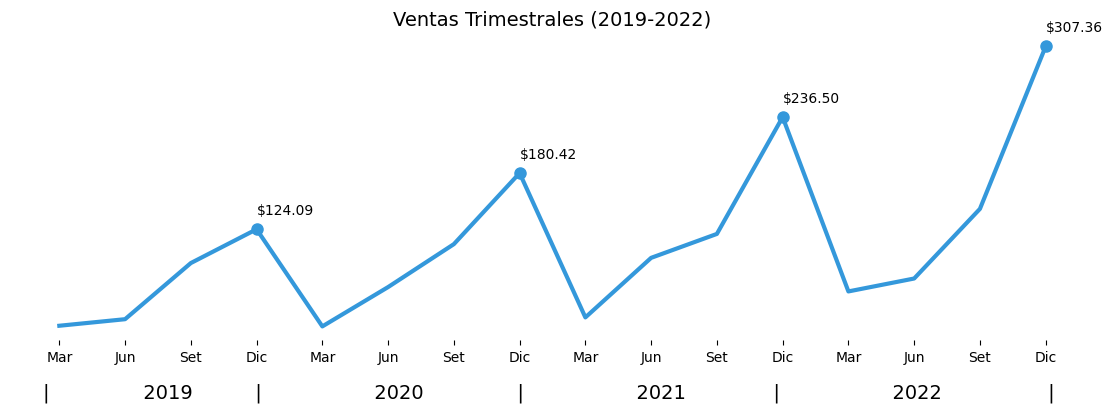

In [52]:
def pregunta5(): 
    
    global df_ventas, df_ventas_limpio
    
    # Creamos una copia y filtramos los registros
    df_ventas_sp = df_ventas_limpio[df_ventas_limpio['estado'] == 'São Paulo'].copy()
    
    # Seleccionamos las columnas fecha_pedido y total_venta
    df_ventas_sp = df_ventas_sp[['fecha_pedido', 'total_venta']]
    
    # Establecemos la columna fecha_pedido como índice
    df_ventas_sp.set_index('fecha_pedido', inplace=True)
    
    # agrupamos las ventas por trimestre ('Q') y sumamos los valores en forma trimestral
    df_ventas_sp['total_venta'] = pd.to_numeric(df_ventas_sp['total_venta'], errors='coerce')
    
    # Agrupa las ventas por trimestre y suma los valores
    df_ventas_sp = df_ventas_sp.resample('Q').agg('sum')
    
    # Redondear la columna total_venta a la escala de miles
    df_ventas_sp['total_venta'] = df_ventas_sp['total_venta'].round()
    
    # Formatear la columna total_venta para mostrarla en miles con dos decimales
    df_ventas_sp['total_venta'] = df_ventas_sp['total_venta'].apply(lambda x: f'{x/1000:.2f}')

    # Convertir la columna total_venta a tipo numérico
    df_ventas_sp['total_venta'] = pd.to_numeric(df_ventas_sp['total_venta'])
    # Restablecer el índice y mantener la columna 'fecha_pedido'
    df_ventas_sp = df_ventas_sp.reset_index()

    
    # Configuración de la figura y el eje
    fig, ax = plt.subplots(figsize=(14, 4))
        
    # Crear el gráfico de líneas
    puntos_a_marcar = [False, False, False, True, False, False, False, True, False, False, False, True, False, False, False, True]
    ax.plot(df_ventas_sp.index, df_ventas_sp['total_venta'], marker="o", markersize=8,  markevery=puntos_a_marcar,color='#3498db', linewidth=3)
        
    # Reemplazar las fechas en el eje X por el nombre del mes
    x_labels = ["Mar", "Jun", "Set", "Dic"] * 4
    ax.set_xticks(df_ventas_sp.index)
    ax.set_xticklabels(x_labels, ha="center")
        
    # Colocar valores solo en el 4to Trimestre
    for i in range(3, len(df_ventas_sp), 4):
        max_value = df_ventas_sp['total_venta'][i:i+4].max()
        max_index = df_ventas_sp['total_venta'][i:i+4].idxmax()
        ax.text(max_index, max_value + 15, f"${max_value:,.2f}", ha='left')
        
    # Configuramos el titulo
    ax.set_title('Ventas Trimestrales (2019-2022)',fontsize=14, color='black')
    #ax.set_xlabel('Trimestre')
    #ax.set_ylabel('Total de Ventas ($)')
        
    # Ocultar todos los bordes del gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
        
        
    # Ocultar etiquetas del eje y
    ax.set_yticks([])
        
    # Texto 
    texto = ("|               2019          |                  2020               |                  2021              |                  2022                 |")
        
    # Añadir texto y alinear 
    ax.text(0.03, -0.2, texto, transform=ax.transAxes, ha='left', va='bottom', fontsize=14, color='black')
        
    # Mostrar el gráfico
    plt.show()

# Llamar a la función
pregunta5()

**Se puede obserbar claramente un crecimiento trimestral constante. 
Las ventas alcanzaron su punto más alto en el último trimestre del año 2022, destacando un aumento significativo en comparación con los años anteriores.**

## 6. ¿Que cliente gasto mas?

In [53]:
# agrupamos por el nombre del cliente y sumamos el valor de la venta
compras_por_cliente = df_ventas_limpio.groupby('nombre_cliente')['total_venta'].sum().reset_index()

# ordenamos en orden descendente 
compras_por_cliente = compras_por_cliente.sort_values(by='total_venta', ascending=False)

compras_por_cliente


,nombre_cliente,total_venta
530,Maria Luiza Almeida,64688.96
42,Ana Julia Pinto,51360.53
515,Maria Clara Gonçalves,46659.86
683,Ryan Farias,45863.75
291,Heitor da Mata,44947.18
...,...,...
1,Agatha Carvalho,49.72
497,Marcelo Ramos,47.73
46,Ana Júlia Moura,33.40
297,Henrique Caldeira,22.84


### Top 10 Clientes que Más Han Gastado

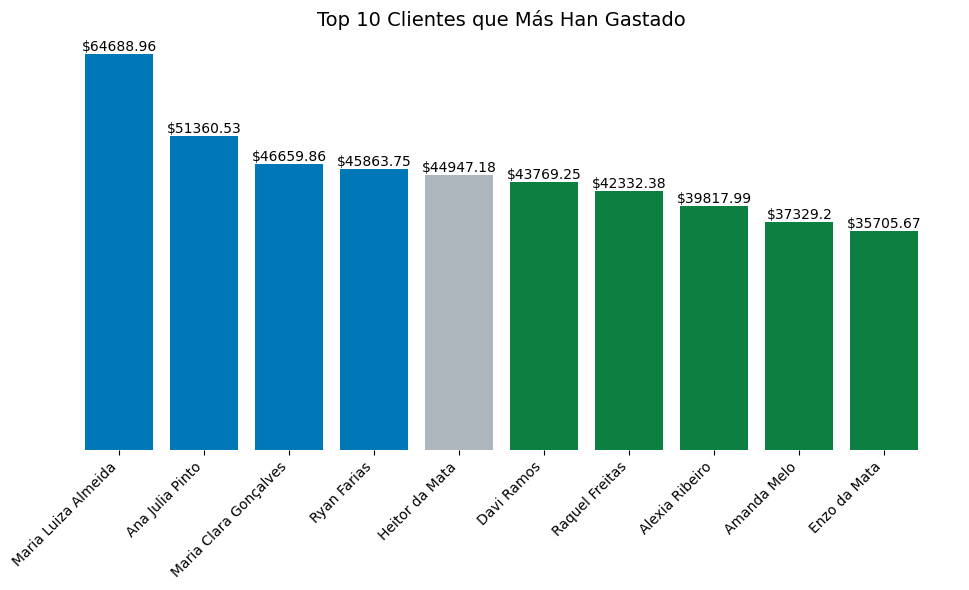

In [54]:
def pregunta6():
    global df_ventas, df_ventas_limpio
    # Agrupamos por el nombre del cliente y sumamos el valor de la venta
    compras_por_cliente = df_ventas_limpio.groupby('nombre_cliente')['total_venta'].sum().reset_index()

    # Ordenamos en orden descendente 
    compras_por_cliente = compras_por_cliente.sort_values(by='total_venta', ascending=False)

    # Seleccionamos los 10 primeros clientes
    top_10_clientes = compras_por_cliente.head(10)

    # Creamos una lista de colores
    colores = ['#0077b6', '#0077b6', '#0077b6', '#0077b6', '#adb5bd', '#0C8040', '#0C8040', '#0C8040', '#0C8040', '#0C8040']

    # Graficamos
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(top_10_clientes['nombre_cliente'], top_10_clientes['total_venta'], color=colores)

    # Agregamos los valores en las barras
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f"${round(yval, 2)}", ha='center', va='bottom')

    #plt.xlabel('Clientes')
    #plt.ylabel('Total de Ventas')
    plt.title('Top 10 Clientes que Más Han Gastado', fontsize=14, color='black')

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Ocultar todos los bordes del gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Ocultar etiquetas del eje y
    ax.set_yticks([])

    plt.show()
pregunta6()

## Top 10 clientes que menos han gastado

In [55]:
# agrupamos por el nombre del cliente y sumamos el valor de la venta
compras_por_cliente_menos = df_ventas_limpio.groupby('nombre_cliente')['total_venta'].sum().reset_index()

# ordenamos en orden descendente 
compras_por_cliente_menos = compras_por_cliente_menos.sort_values(by='total_venta',  ascending=True)

compras_por_cliente_menos

,nombre_cliente,total_venta
481,Luiz Otávio Viana,18.03
297,Henrique Caldeira,22.84
46,Ana Júlia Moura,33.40
497,Marcelo Ramos,47.73
1,Agatha Carvalho,49.72
...,...,...
291,Heitor da Mata,44947.18
683,Ryan Farias,45863.75
515,Maria Clara Gonçalves,46659.86
42,Ana Julia Pinto,51360.53


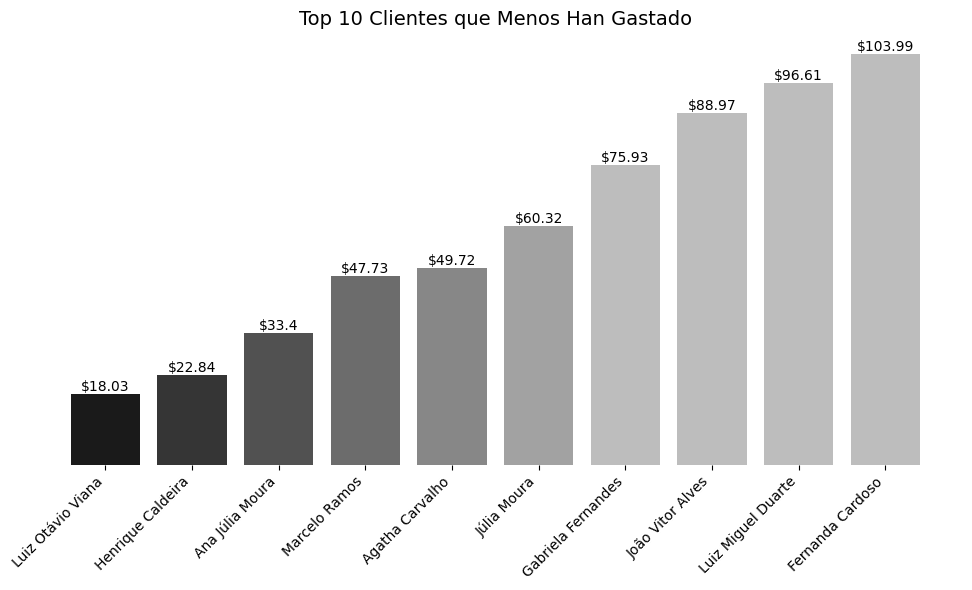

In [56]:
def pregunta6_menos_gastaron():
    global df_ventas, df_ventas_limpio
    
    # Agrupamos por el nombre del cliente y sumamos el valor de la venta
    compras_por_cliente = df_ventas_limpio.groupby('nombre_cliente')['total_venta'].sum().reset_index()

    # Ordenamos en orden ascendente para obtener los que menos gastaron
    compras_por_cliente = compras_por_cliente.sort_values(by='total_venta', ascending=True)

    # Seleccionamos los 10 primeros clientes (los que menos gastaron)
    bottom_10_clientes = compras_por_cliente.head(10)

    # Creamos una lista de colores 
    #colores = ['#adb5bd'] * 10  # usamos un solo color 
    colores = ['#1A1A1A', '#353535', '#515151', '#6C6C6C', '#878787', '#A2A2A2', '#BDBDBD', '#BDBDBD', '#BDBDBD', '#BDBDBD']

    # Graficamos
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(bottom_10_clientes['nombre_cliente'], bottom_10_clientes['total_venta'], color=colores)

    # Agregamos los valores en las barras
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f"${round(yval, 2)}", ha='center', va='bottom')

    #plt.xlabel('Clientes')
    #plt.ylabel('Total de Ventas')
    plt.title('Top 10 Clientes que Menos Han Gastado', fontsize=14, color='black')

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Ocultar todos los bordes del gráfico
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Ocultar etiquetas del eje y
    ax.set_yticks([])

    plt.show()

# Llamar a la función
pregunta6_menos_gastaron()


**Estos clientes con menor gasto se puede tomar como oportunidades de mejora:**


- **Incentivos personalizados:** Podría ser interesante ofrecer a estos clientes promociones o descuentos exclusivos para motivarlos a realizar compras adicionales.
- **Análisis de comportamiento:** Se podría investigar si estos clientes tienen algo en común, como patrones de compra, productos favoritos o incluso restricciones geográficas. Esto ayudaría a diseñar campañas más efectivas.
- **Fidelización:** El objetivo debe ser aumentar el compromiso de estos clientes con la marca, ofreciéndoles, por ejemplo, beneficios de fidelización o programas de referidos.

  
Este grupo de clientes representa una oportunidad para el negocio de expandir su base de ingresos, aprovechando su potencial de crecimiento. Estudios de marketing relacional sugieren que convertir clientes de bajo valor en clientes recurrentes puede ser más rentable que adquirir nuevos clientes.